Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_recall_curve,roc_curve, auc
import xgboost as xgb

Mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset to a Pandas DataFrame
#credit_card_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Project 1:Credit card Fraud /creditcard.csv')

# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Project 1:Credit card Fraud /creditcard_2023.csv')

In [4]:
# first 5 rows of the dataset
credit_card_data.head().style.background_gradient(cmap='Purples')

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.100000,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.370000,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.540000,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.440000,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.970000,0


In [5]:
credit_card_data.tail().style.background_gradient(cmap='Purples')

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,-1.376970,1.789103,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.160000,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.400000,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.850000,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,0.930280,-0.481058,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.830000,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,-0.513556,0.892136,-1.153011,0.489197,-1.062488,0.207773,-0.917240,-0.936114,-0.823688,-0.330408,-0.621378,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.920000,1


In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

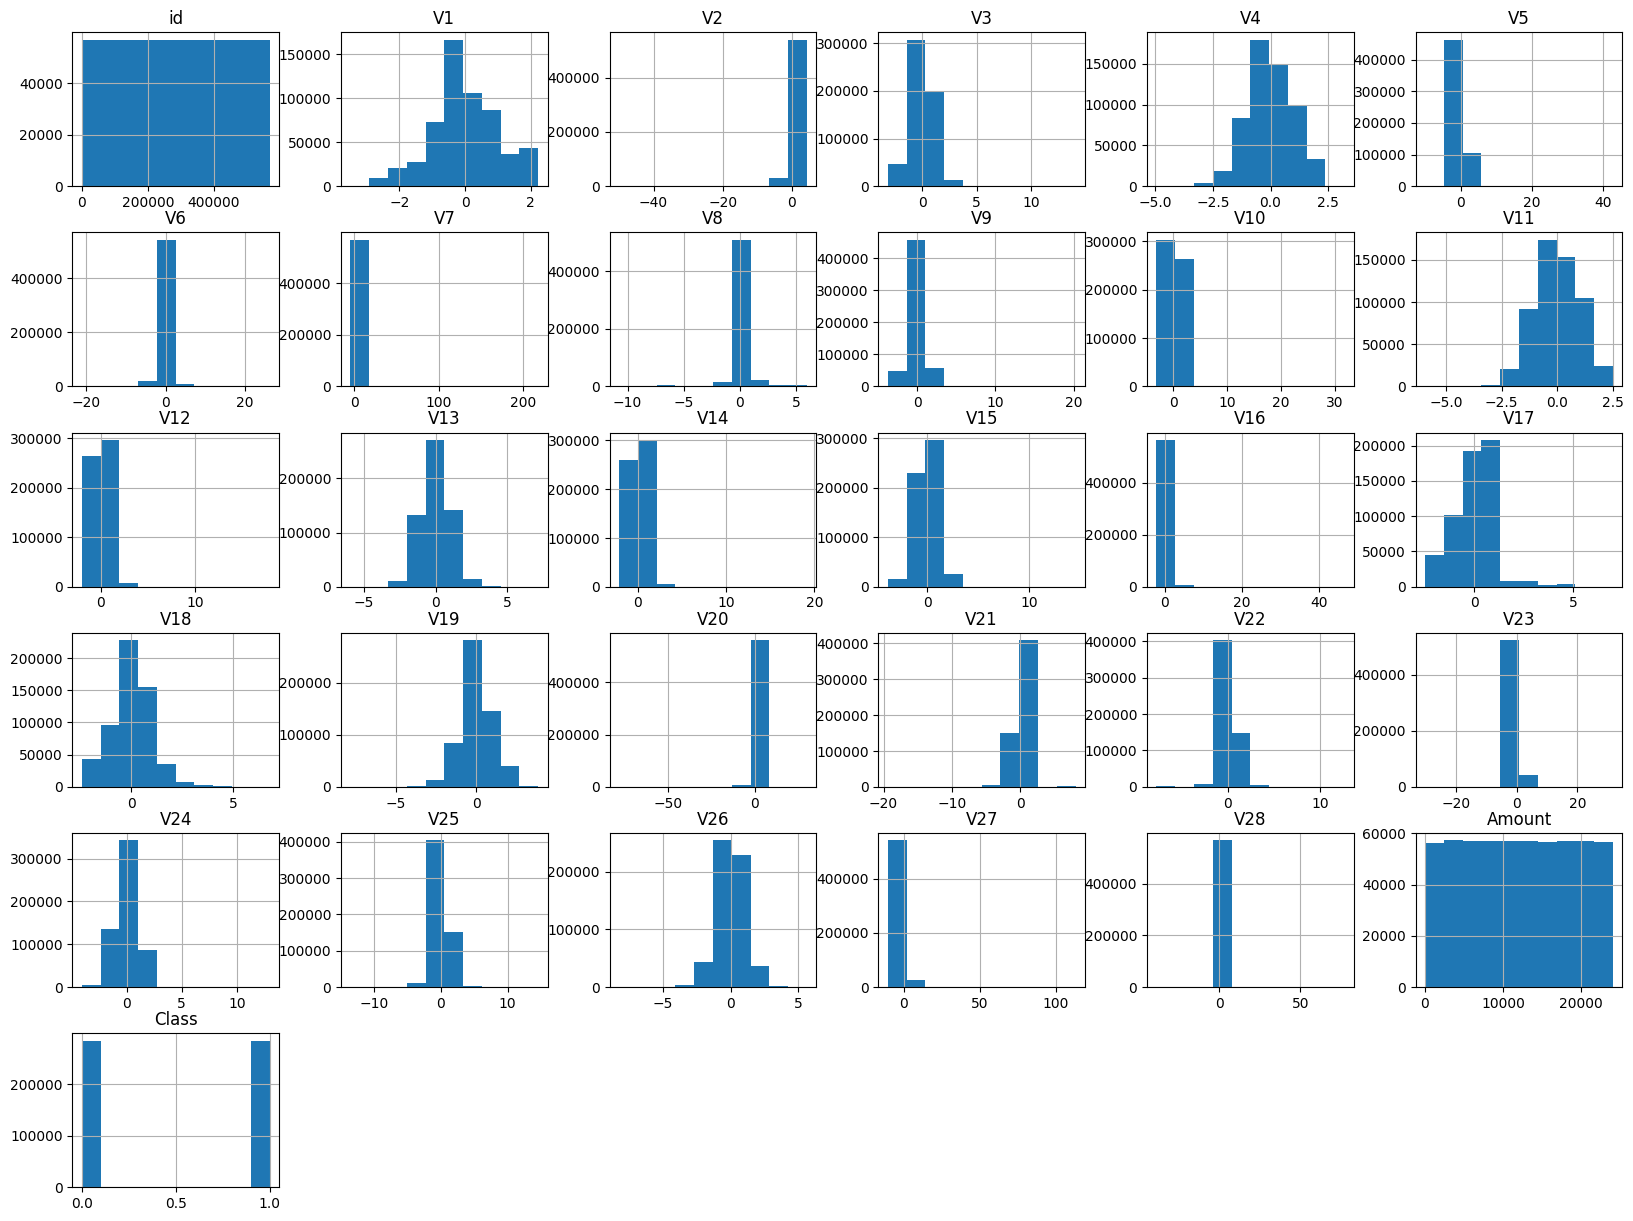

In [7]:
credit_card_data.hist(figsize=(20, 15))
plt.show()

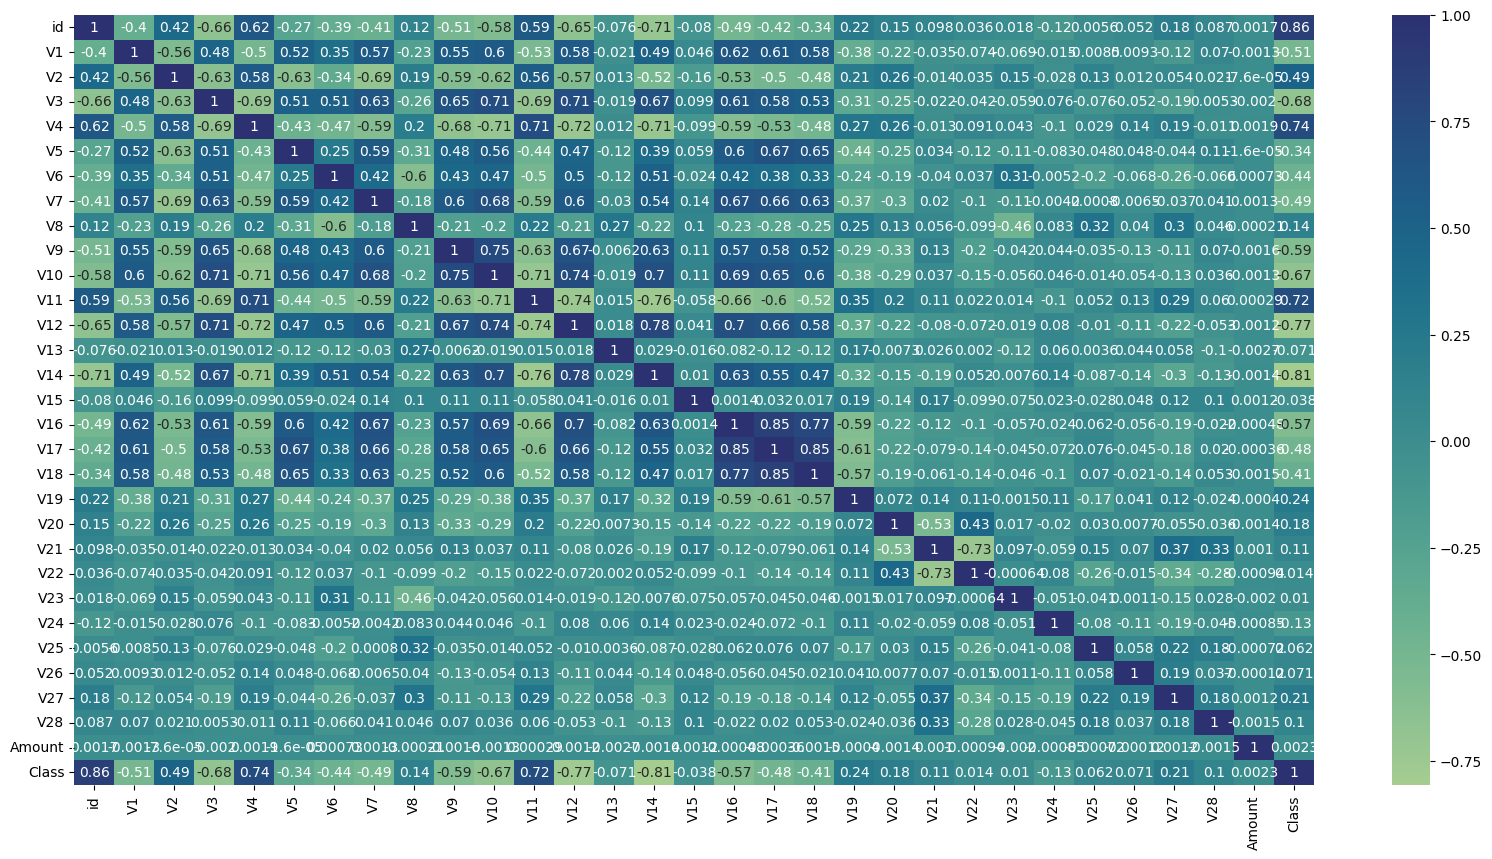

In [8]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(credit_card_data.corr(),cmap='crest',annot=True)
plt.show()

In [9]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

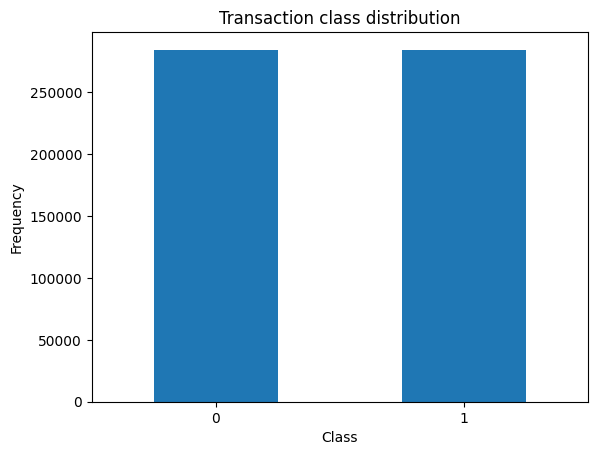

In [11]:
count_classes = pd.value_counts(credit_card_data['Class'], sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Create Histogram with Density Curve Using Seaborn

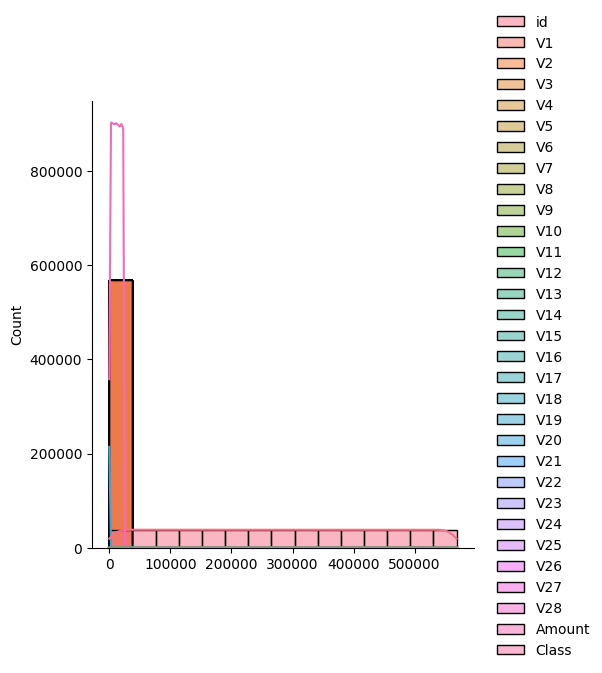

In [12]:
sns.displot(credit_card_data, kde=True, bins=15)

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [13]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [14]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(284315, 31)


In [15]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [17]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [18]:
legit_sample = legit.sample(n=1000)

Changing the Number of the fraud ammount

In [19]:
fraud_sample = fraud.sample(n=1000)

Concatenating two DataFrames

In [20]:
new_dataset = pd.concat([legit_sample, fraud_sample], axis=0)

In [21]:
new_dataset.head().style.background_gradient(cmap='Purples')

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
149980,149980,1.380542,-0.934393,0.754658,-0.415595,0.004136,1.773041,-0.067254,0.048950,4.112192,0.227005,-0.141797,0.161789,1.278543,1.023994,-1.790558,-0.034954,0.934331,0.241265,-0.549506,-0.431361,-0.066713,1.000073,0.040343,-2.558194,-0.617477,-0.795231,-0.078093,-0.210224,10650.460000,0
186920,186920,-0.275698,-0.165063,0.756275,-1.163022,0.852862,1.335822,0.578704,0.065015,-0.017931,0.243983,-0.018261,1.335270,0.057082,1.205398,0.504517,0.015723,0.629348,-0.346362,-1.543505,-0.456202,0.091377,1.352358,-0.534979,-2.586689,1.117361,1.672352,-0.478806,-0.259053,16004.600000,0
230189,230189,-0.576399,0.085827,0.798912,-0.573328,0.533363,3.468497,-0.366200,-0.450844,1.341240,0.361272,-1.797060,1.385677,-0.266393,0.515744,-0.991035,0.189836,0.810572,0.677105,0.404794,-1.041200,1.320213,-0.570851,0.227492,1.436610,1.186683,-0.237328,0.057508,0.023302,1701.540000,0
1259,1259,0.870250,-0.500450,0.994753,-0.055203,0.050273,0.629769,0.330738,-0.120220,1.102952,0.464413,-1.176778,1.319320,0.144903,0.495143,-0.754690,0.042869,0.599031,-0.174863,-0.402054,-0.268882,-0.126539,0.086247,-0.134526,0.271894,0.949910,-0.659128,-0.157760,-0.028107,3453.060000,0
71910,71910,1.296313,-0.801863,0.620680,-1.653910,-0.074648,0.531211,0.108385,-0.157767,-0.505019,1.449604,-0.366346,0.684978,1.953295,0.469896,-0.038121,0.658691,0.342608,0.807049,0.188294,-0.374761,-0.259602,-0.667284,-0.012697,-1.425737,0.409673,-0.863091,-0.184478,-0.076492,6446.670000,0


In [22]:
new_dataset.tail().style.background_gradient(cmap='Purples')

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
535124,535124,-0.473182,0.510514,-0.085194,-0.169060,0.422172,1.387752,-0.222235,-1.844755,2.758711,0.569652,-0.807985,-0.055733,0.531824,-0.140424,-1.165679,0.692688,1.914441,2.019882,-0.781359,-2.233683,2.810736,-1.736829,1.336255,-0.490456,-1.515882,-1.412905,-0.342970,-0.361414,11836.730000,1
466744,466744,-1.314737,-1.797782,-0.616368,1.277386,-0.542510,0.545492,-0.324033,0.071356,-0.678898,-0.416694,1.165331,-0.847214,0.211405,-0.860186,2.510513,-0.887734,-1.017873,-1.061419,0.785770,-2.006630,-0.050786,0.230314,-3.470055,0.116511,-1.755827,0.567263,2.399060,-4.314392,14322.450000,1
310738,310738,-0.422683,0.563159,-0.582133,0.346898,-0.378520,-1.014523,-0.523308,0.264180,-0.193492,-1.010711,1.447663,-1.230720,0.479601,-0.985168,-0.505113,-0.758885,-0.729205,-0.328714,0.088778,0.282595,0.151061,-0.494587,-0.029088,0.174407,0.044056,0.680532,0.385931,0.533457,571.730000,1
409015,409015,0.666224,0.228809,-0.665600,0.667522,0.228847,-0.320840,-0.061826,0.039229,-0.297019,-0.323286,0.707578,-0.505449,-1.317186,-0.798170,0.151579,-0.475476,0.080767,0.602540,1.450047,0.117546,0.044717,-0.024233,0.154433,0.658358,-0.787180,-0.547089,0.137259,-0.165745,22768.770000,1
405900,405900,-0.364490,0.523754,-0.482060,0.309276,-0.343895,-1.278311,-0.383097,0.192030,0.067065,-0.908288,0.994823,-1.190373,0.427732,-0.869160,0.233653,-0.615478,-0.443916,-0.310479,-0.429679,0.203199,0.077211,-0.552107,0.021139,0.956010,-0.011433,0.677729,0.425730,0.485473,15620.910000,1


In [23]:
new_dataset['Class'].value_counts()

0    1000
1    1000
Name: Class, dtype: int64

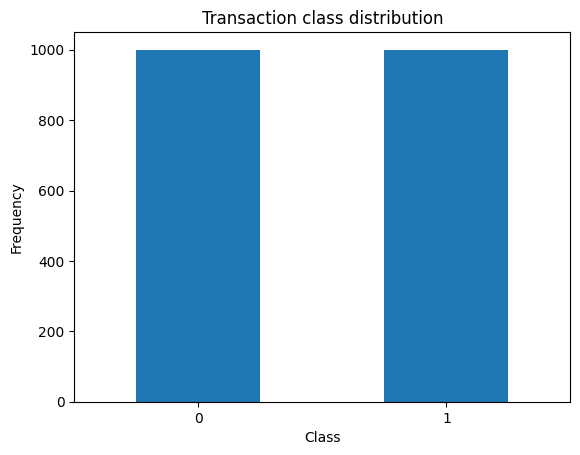

In [24]:
count_classes = pd.value_counts(new_dataset['Class'], sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Create Histogram with Density Curve Using Seaborn

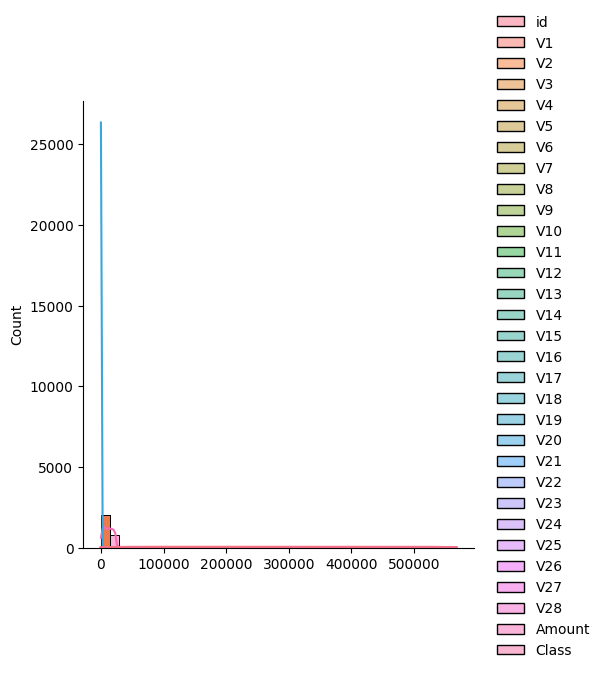

In [25]:
sns.displot(new_dataset , kde=True, bins=40)

In [26]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 149980 to 405900
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2000 non-null   int64  
 1   V1      2000 non-null   float64
 2   V2      2000 non-null   float64
 3   V3      2000 non-null   float64
 4   V4      2000 non-null   float64
 5   V5      2000 non-null   float64
 6   V6      2000 non-null   float64
 7   V7      2000 non-null   float64
 8   V8      2000 non-null   float64
 9   V9      2000 non-null   float64
 10  V10     2000 non-null   float64
 11  V11     2000 non-null   float64
 12  V12     2000 non-null   float64
 13  V13     2000 non-null   float64
 14  V14     2000 non-null   float64
 15  V15     2000 non-null   float64
 16  V16     2000 non-null   float64
 17  V17     2000 non-null   float64
 18  V18     2000 non-null   float64
 19  V19     2000 non-null   float64
 20  V20     2000 non-null   float64
 21  V21     2000 non-null   float6

Create histograms for each column

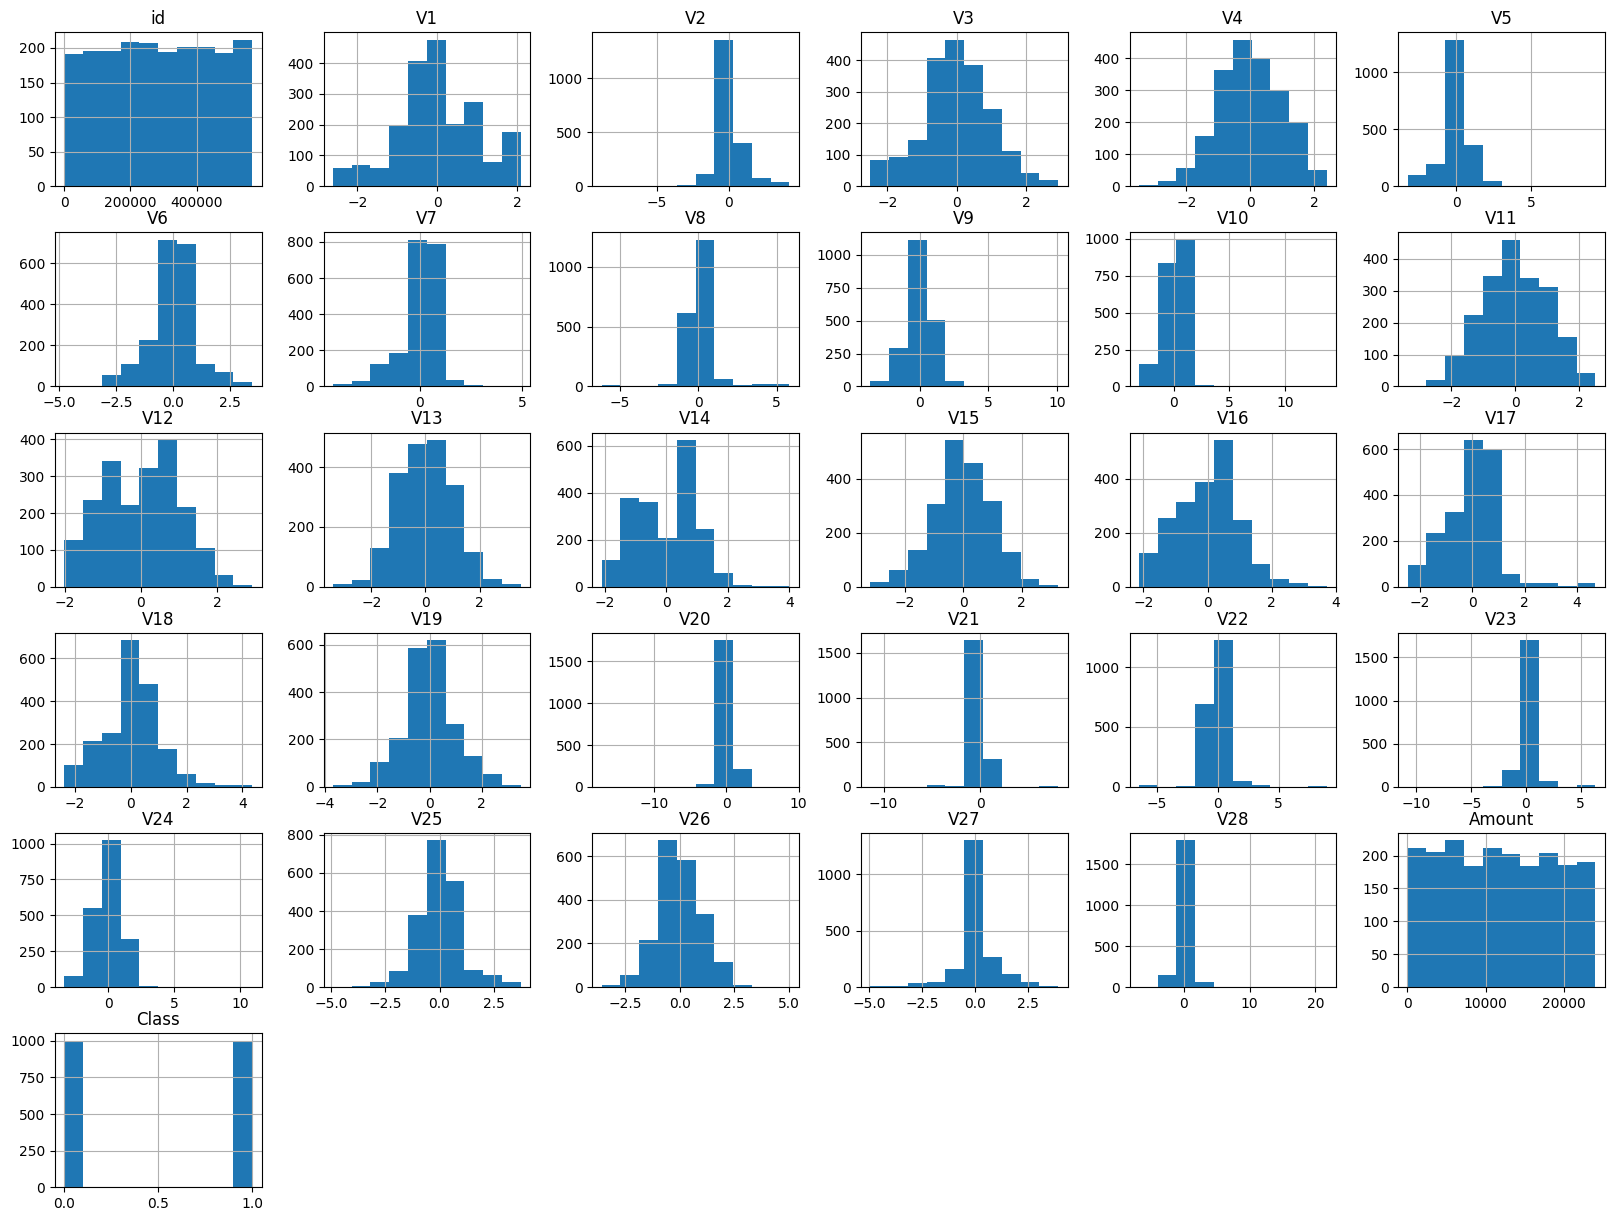

In [27]:
new_dataset.hist(figsize=(20, 15))
plt.show()

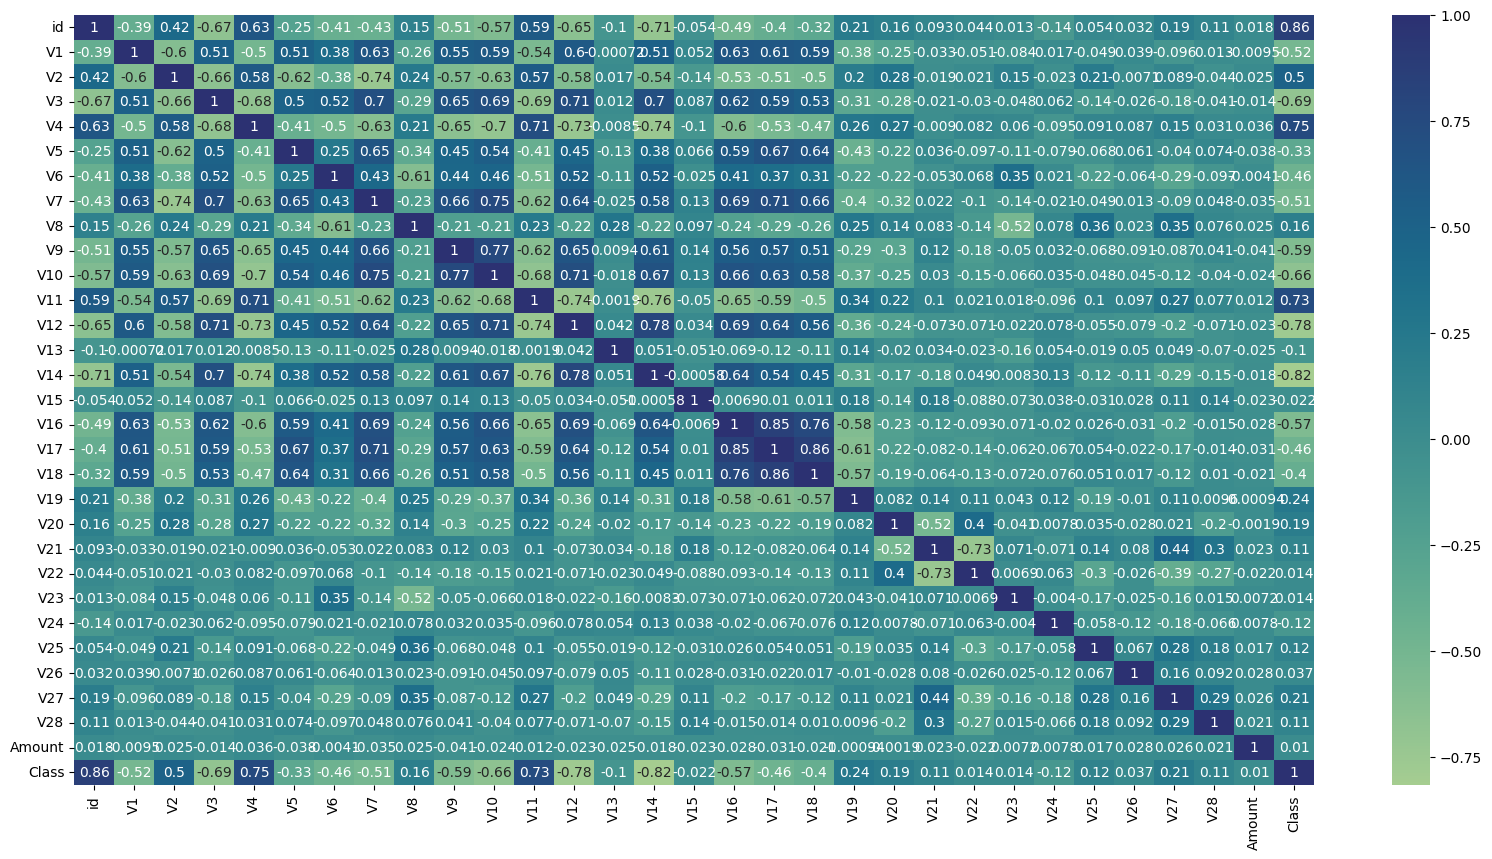

In [28]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(new_dataset.corr(),cmap='crest',annot=True)
plt.show()

In [29]:
new_dataset.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,144257.774,0.514675,-0.506513,0.671656,-0.755623,0.338730,0.463456,0.476887,-0.142543,0.597488,...,-0.157918,-0.103003,-0.019952,-0.00584,0.122392,-0.116499,-0.029797,-0.225550,-0.076906,11710.57383
1,426344.979,-0.511013,0.489045,-0.694439,0.735900,-0.333711,-0.457709,-0.462980,0.196385,-0.585650,...,0.212189,0.107701,0.008504,0.01974,-0.131594,0.120140,0.044360,0.169376,0.145338,11851.85793


Splitting the data into Features & Targets

In [30]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [31]:
print(X)

            id        V1        V2        V3        V4        V5        V6  \
149980  149980  1.380542 -0.934393  0.754658 -0.415595  0.004136  1.773041   
186920  186920 -0.275698 -0.165063  0.756275 -1.163022  0.852862  1.335822   
230189  230189 -0.576399  0.085827  0.798912 -0.573328  0.533363  3.468497   
1259      1259  0.870250 -0.500450  0.994753 -0.055203  0.050273  0.629769   
71910    71910  1.296313 -0.801863  0.620680 -1.653910 -0.074648  0.531211   
...        ...       ...       ...       ...       ...       ...       ...   
535124  535124 -0.473182  0.510514 -0.085194 -0.169060  0.422172  1.387752   
466744  466744 -1.314737 -1.797782 -0.616368  1.277386 -0.542510  0.545492   
310738  310738 -0.422683  0.563159 -0.582133  0.346898 -0.378520 -1.014523   
409015  409015  0.666224  0.228809 -0.665600  0.667522  0.228847 -0.320840   
405900  405900 -0.364490  0.523754 -0.482060  0.309276 -0.343895 -1.278311   

              V7        V8        V9  ...       V20       V21  

In [32]:
print(Y)

149980    0
186920    0
230189    0
1259      0
71910     0
         ..
535124    1
466744    1
310738    1
409015    1
405900    1
Name: Class, Length: 2000, dtype: int64


Split the data into Training data & Testing Data with Train_Test_split

In [33]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Split the data into Training data & Testing Data with K-fold

In [34]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

In [35]:
# Iterate over the folds
for train_index, test_index in k_fold.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 30) (1800, 30) (200, 30)


Model Training

Logistic Regression,Random Forest, Dicision Tree, GB, xgbrf,Adaboost

In [45]:
models={
    "Logistic Regression" :LogisticRegression(max_iter=200),
    "Random Forest" :RandomForestClassifier(),
    "Gradient Boost" :GradientBoostingClassifier(),
    "Decision Tree" :DecisionTreeClassifier(),
    "XGCLF" : xgb.XGBRFClassifier(),
    "Adaboost" : AdaBoostClassifier()
}

In [46]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # model Prediction
    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    # accuracy on training data

    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    #conf_matrix = confusion_matrix(X_train_prediction, Y_train)
    #clas_rep = classification_report(X_train_prediction, Y_train)

    # accuracy on test data

    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    conf_matrix = confusion_matrix(X_test_prediction, Y_test)
    clas_rep = classification_report(X_test_prediction, Y_test)

    print(list(models.keys())[i])
    print('------------------------------------------------')

    print(f'\n Accuracy on Training data : {training_data_accuracy*100:.2f}%')

    print(f' Accuracy score on Test Data : {test_data_accuracy*100:.2f}%')
    print('------------------------------------------------')
    #print(conf_matrix,'\n')
    #print(clas_rep)
    print('\n')

Logistic Regression
------------------------------------------------

 Accuracy on Training data : 78.72%
 Accuracy score on Test Data : 78.00%
------------------------------------------------


Random Forest
------------------------------------------------

 Accuracy on Training data : 100.00%
 Accuracy score on Test Data : 100.00%
------------------------------------------------


Gradient Boost
------------------------------------------------

 Accuracy on Training data : 100.00%
 Accuracy score on Test Data : 100.00%
------------------------------------------------


Decision Tree
------------------------------------------------

 Accuracy on Training data : 100.00%
 Accuracy score on Test Data : 100.00%
------------------------------------------------


XGCLF
------------------------------------------------

 Accuracy on Training data : 99.78%
 Accuracy score on Test Data : 100.00%
------------------------------------------------


Adaboost
----------------------------------------

Displaying the ROC curve, Precision-Recall curve, and Confusion Matrix

Random Forest


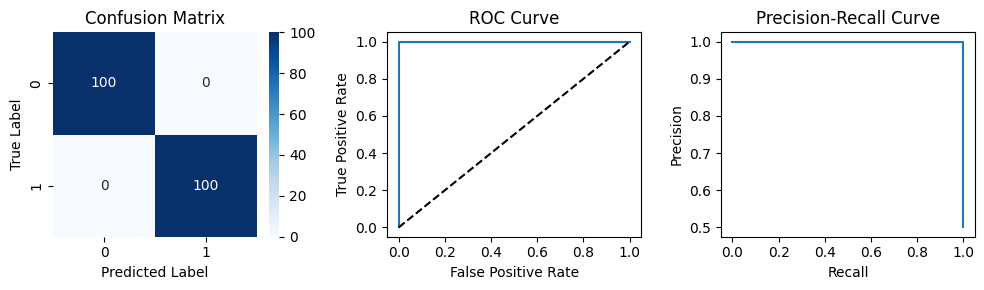

Gradient Boost


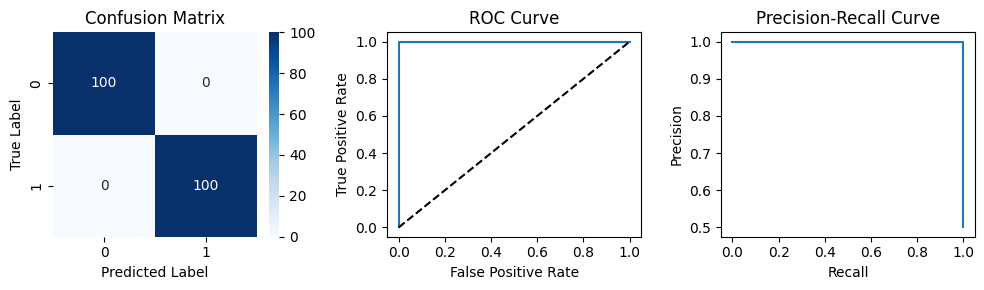

In [39]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    # Create confusion matrix
    conf_matrix = confusion_matrix(X_test_prediction, Y_test)
    # Compute ROC curve and AUC
    fpr, tpr, thresholds_roc = roc_curve(X_test_prediction, Y_test)
    roc_auc = auc(fpr, tpr)
    # Compute precision-recall pairs for different probability thresholds
    precision, recall, thresholds_pr = precision_recall_curve(X_test_prediction, Y_test)

    print(list(models.keys())[i])

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    #plt.legend()

    # Plot ROC curve
    plt.subplot(1, 3, 2)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #Receiver Operating Characteristic (ROC)
    plt.title('ROC Curve')
    #plt.legend()

    # Plot Precision-Recall curve
    plt.subplot(1, 3, 3)
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

Classification reports for each model

In [40]:
from tabulate import tabulate

In [41]:
clas_reps=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    clas_rep = classification_report(X_test_prediction, Y_test, target_names=['Class 0', 'Class 1'])
    #formated_clas_rep = clas_rep.replace('\n\n', '\n').replace('\n \n', '\n').replace('\n', '\n ')
    clas_reps.append({'Model': list(models.keys())[i],'Report':clas_rep})

#print(list(models.keys()))
#print('------------------------------------------------')
#print(clas_rep)
table = tabulate(clas_reps, headers='keys', tablefmt='heavy_grid')
print(table)


┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model          ┃ Report                                                ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Random Forest  ┃ precision    recall  f1-score   support               ┃
┃                ┃                                                       ┃
┃                ┃      Class 0       1.00      1.00      1.00       100 ┃
┃                ┃      Class 1       1.00      1.00      1.00       100 ┃
┃                ┃                                                       ┃
┃                ┃     accuracy                           1.00       200 ┃
┃                ┃    macro avg       1.00      1.00      1.00       200 ┃
┃                ┃ weighted avg       1.00      1.00      1.00       200 ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Gradient Boost ┃ precision    recall  f1-score   support               ┃
┃                ┃       